In [1]:
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import spacy
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, classification_report, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import spacy 

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample = pd.read_csv('data/sample_submission.csv')

In [3]:
sample.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


In [4]:
target_columns = list(sample.columns.drop('id'))
target_columns

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [5]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
classfreq1 = train[target_columns].sum()
classfreq1

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

## Frequency of each class in the training set

<AxesSubplot:>

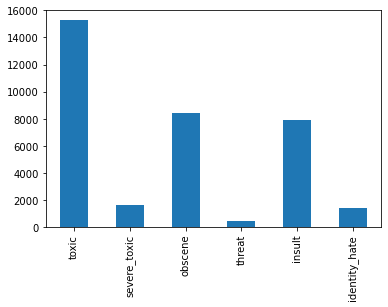

In [8]:
classfreq1.plot(kind='bar')

<AxesSubplot:>

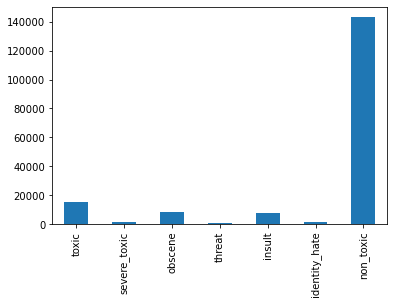

In [9]:
x=train.iloc[:,2:].sum()
rowsums=train.iloc[:,2:].sum(axis=1)
train['non_toxic']=(rowsums==0)
train['non_toxic'].sum()
graph_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'non_toxic']
classfreq2 = train[graph_columns].sum()
classfreq2.plot(kind='bar')

## Correlations 

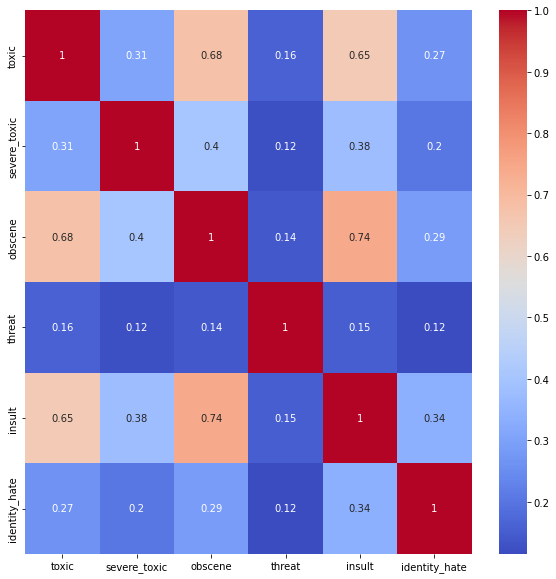

In [10]:
heatmap_data = train[target_columns]
plt.figure(figsize=(10, 10))
ax = sns.heatmap(heatmap_data.corr(), cmap='coolwarm', annot=True)
ax.tick_params(labelsize=10)

## Lengths of texts

average length of comment: 394.073


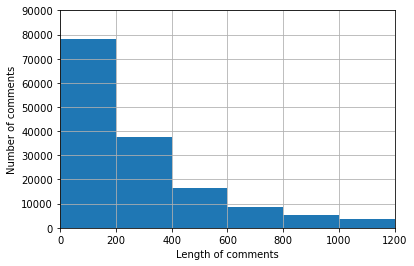

In [11]:
x = [len(train['comment_text'][i]) for i in range(train['comment_text'].shape[0])]

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()

In [12]:
label = train[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]
print(label.head())

   toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0              0
1      0             0        0       0       0              0
2      0             0        0       0       0              0
3      0             0        0       0       0              0
4      0             0        0       0       0              0


In [ ]:
## Number of comments classified depending on their lengths
y = np.zeros(label.shape)
for ix in range(train['comment_text'].shape[0]):
    l = len(train['comment_text'][ix])
    if label['toxic'].iloc[ix] :
        y[ix][0] = l
    if label['severe_toxic'].iloc[ix] :
        y[ix][1] = l
    if label['obscene'].iloc[ix] :
        y[ix][2] = l
    if label['threat'].iloc[ix] :
        y[ix][3] = l
    if label['insult'].iloc[ix] :
        y[ix][4] = l
    if label['identity_hate'].iloc[ix] :
        y[ix][5] = l

labelsplt = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
bins = range(1, 8000, 100)
color = ['red','green','blue','yellow','orange','chartreuse']  
plt.figure(figsize=(20,20))

for i in range(6):
    plt.hist(y[:,i], bins=bins, label=labelsplt[i], color=color[i], alpha=0.3)
plt.axis([0, 1200, 0, 8000])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments') 
plt.legend()
plt.grid(True)
plt.show()

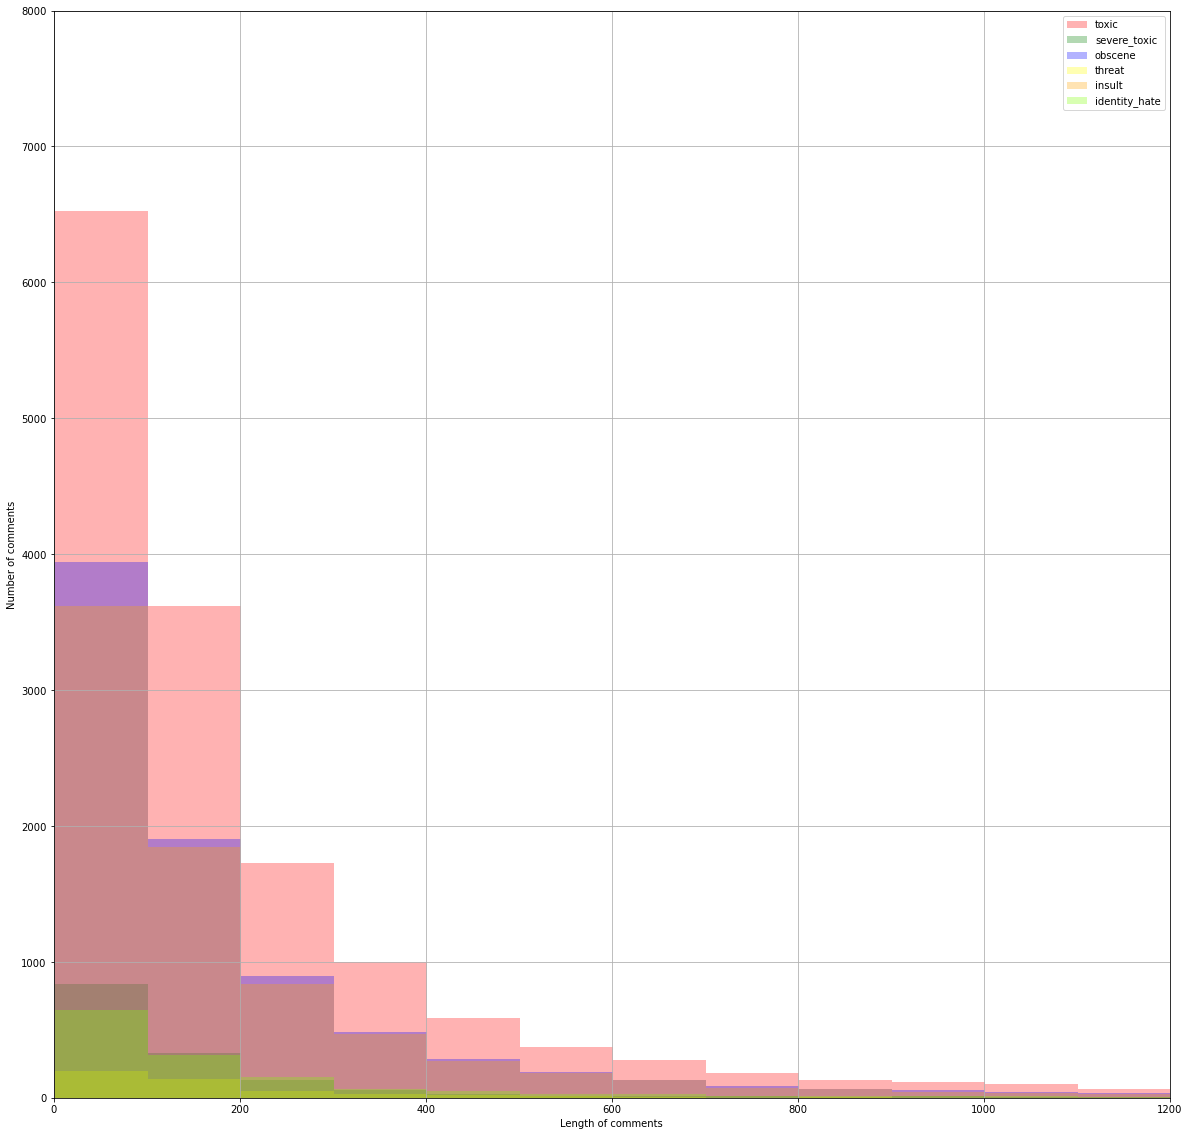

In [13]:
y = np.zeros(label.shape)
for ix in range(train['comment_text'].shape[0]):
    l = len(train['comment_text'][ix])
    if label['toxic'].iloc[ix] :
        y[ix][0] = l
    if label['severe_toxic'].iloc[ix] :
        y[ix][1] = l
    if label['obscene'].iloc[ix] :
        y[ix][2] = l
    if label['threat'].iloc[ix] :
        y[ix][3] = l
    if label['insult'].iloc[ix] :
        y[ix][4] = l
    if label['identity_hate'].iloc[ix] :
        y[ix][5] = l

labelsplt = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
bins = range(1, 8000, 100)
color = ['red','green','blue','yellow','orange','chartreuse']  
plt.figure(figsize=(20,20))

for i in range(6):
    plt.hist(y[:,i], bins=bins, label=labelsplt[i], color=color[i], alpha=0.3)
plt.axis([0, 1200, 0, 8000])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments') 
plt.legend()
plt.grid(True)
plt.show()

## Density Plot

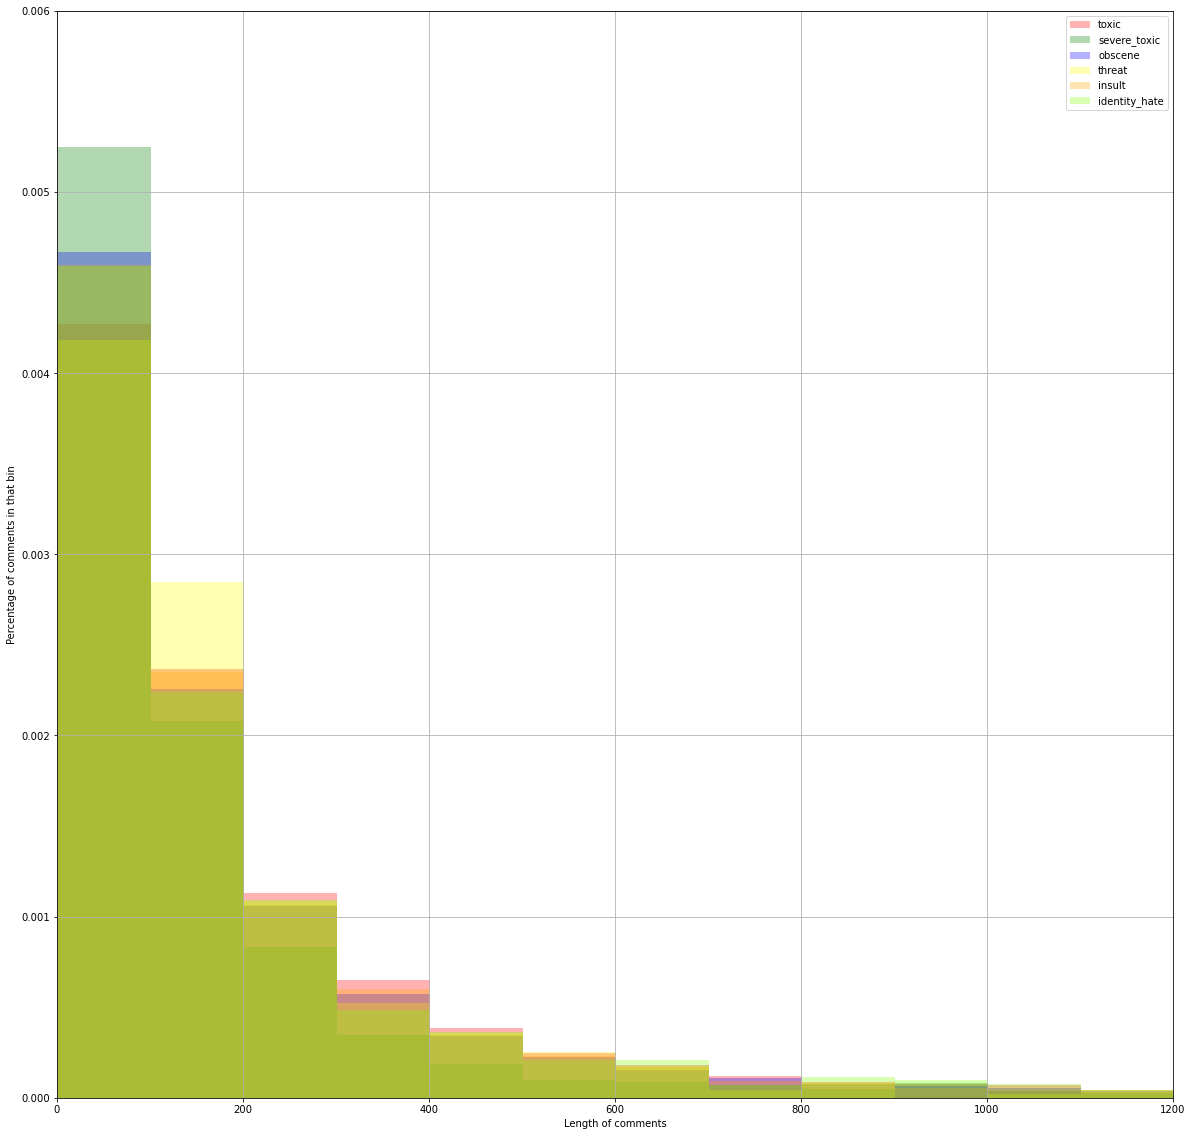

In [14]:
y = np.zeros(label.shape)
for ix in range(train['comment_text'].shape[0]):
    l = len(train['comment_text'][ix])
    if label['toxic'].iloc[ix] :
        y[ix][0] = l
    if label['severe_toxic'].iloc[ix] :
        y[ix][1] = l
    if label['obscene'].iloc[ix] :
        y[ix][2] = l
    if label['threat'].iloc[ix] :
        y[ix][3] = l
    if label['insult'].iloc[ix] :
        y[ix][4] = l
    if label['identity_hate'].iloc[ix] :
        y[ix][5] = l

labelsplt = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

color = ['red','green','blue','yellow','orange','chartreuse']  
plt.figure(figsize=(20,20))
bins = range(1, 8000, 100)

for i in range(6):
    plt.hist(y[:,i], bins=bins, label=labelsplt[i], color=color[i], density = True, alpha=0.3)

plt.axis([0, 1200, 0, 0.006])
plt.xlabel('Length of comments')
plt.ylabel('Percentage of comments in that bin') 
plt.legend()
plt.grid(True)
plt.show()

In [15]:
toxic_comment = train[train['toxic'] == 1]['comment_text'].str.lower()
severe_toxic_comment = train[train['severe_toxic'] == 1]['comment_text'].str.lower()
obscene_comment = train[train['obscene'] == 1]['comment_text'].str.lower()
threat_comment = train[train['threat'] == 1]['comment_text'].str.lower()
insult_comment = train[train['insult'] == 1]['comment_text'].str.lower()
identity_hate_comment = train[train['identity_hate'] == 1]['comment_text'].str.lower()

In [16]:
toxic_comment = toxic_comment.values.tolist()
severe_toxic_comment = severe_toxic_comment.values.tolist()
obscene_comment = obscene_comment.values.tolist()
threat_comment = threat_comment.values.tolist()
insult_comment = insult_comment.values.tolist()
identity_hate_comment = identity_hate_comment.values.tolist()

In [17]:
import nltk
nltk.download('stopwords')

#Tokenizing the words
toxic_comment_break = [nltk.tokenize.wordpunct_tokenize(text) for text in toxic_comment]
severe_toxic_comment_break = [nltk.tokenize.wordpunct_tokenize(text) for text in severe_toxic_comment]
obscene_comment_break = [nltk.tokenize.wordpunct_tokenize(text) for text in obscene_comment]
threat_comment_break = [nltk.tokenize.wordpunct_tokenize(text) for text in threat_comment]
insult_comment_break = [nltk.tokenize.wordpunct_tokenize(text) for text in insult_comment]
identity_hate_comment_break = [nltk.tokenize.wordpunct_tokenize(text) for text in identity_hate_comment]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ozgur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
#Deleting common English words
stopwords = nltk.corpus.stopwords.words('english')

In [19]:
#Deleting repeated characters in words
from itertools import groupby

def clear_multiple_char(comment):        
    ti = []
    for words in comment:
        t = [''.join(["".join(i) for i, _ in groupby(word)]) if len(word)>10 else word for word in words]
        ti.append(t)
    return ti

In [20]:
toxic_comment_break = clear_multiple_char(toxic_comment_break)
severe_toxic_comment_break = clear_multiple_char(severe_toxic_comment_break)
obscene_comment_break = clear_multiple_char(obscene_comment_break)
threat_comment_break = clear_multiple_char(threat_comment_break)
insult_comment_break = clear_multiple_char(insult_comment_break)
identity_hate_comment_break = clear_multiple_char(identity_hate_comment_break)

In [21]:
#Eliminating punctuations and numbers

import string
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
punctuation = string.punctuation # '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
# Add numbers
punctuation += '0123456789'

def comment_raiz(comment):
    text = []
    for lista in comment:
        valids = [stemmer.stem(word) for word in lista if word not in stopwords and word not in punctuation 
                  and len(word)>2]
        valids_true = [''.join([char for char in word if char not in punctuation]) for word in valids if 
                       len(''.join([char for char in word if char not in punctuation]))>0]
        text.append(valids_true)
    return text

In [22]:
toxic_comment_clear = comment_raiz(toxic_comment_break)
severe_toxic_comment_clear = comment_raiz(severe_toxic_comment_break)
obscene_comment_clear = comment_raiz(obscene_comment_break)
threat_comment_clear = comment_raiz(threat_comment_break)
insult_comment_clear = comment_raiz(insult_comment_break)
identity_hate_comment_clear = comment_raiz(identity_hate_comment_break)

In [23]:
from collections import Counter

#Defining the function that counts number of occurance of each word in the comments
def counter(comment_clear):
    cnt = Counter()
    for words in comment_clear:
        for word in words:
            cnt[word] += 1
    return cnt

toxic_comment_cnt = counter(toxic_comment_clear)
severe_toxic_comment_cnt = counter(severe_toxic_comment_clear)
obscene_comment_cnt = counter(obscene_comment_clear)
threat_comment_cnt = counter(threat_comment_clear)
insult_comment_cnt = counter(insult_comment_clear)
identity_hate_comment_cnt = counter(identity_hate_comment_clear)

## Top ten words for each category

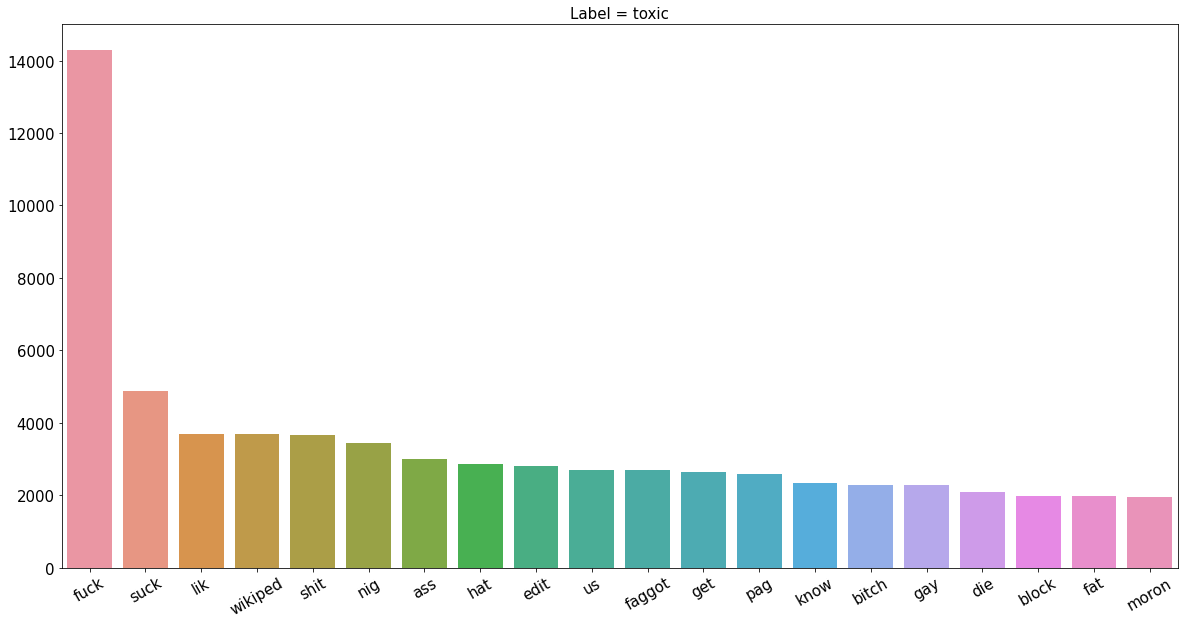

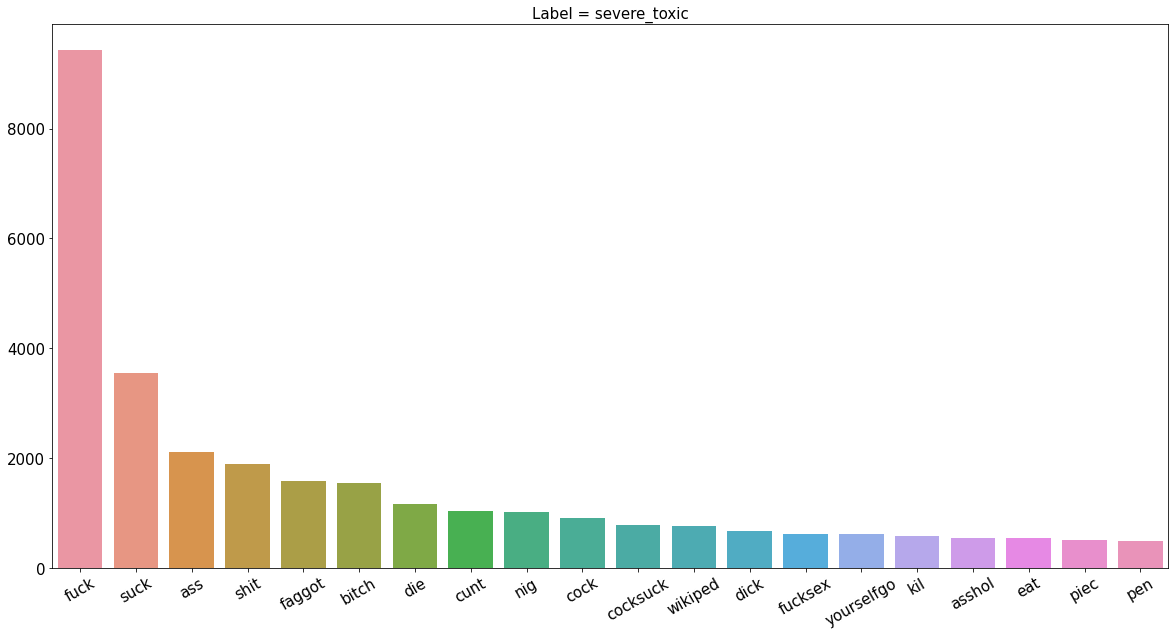

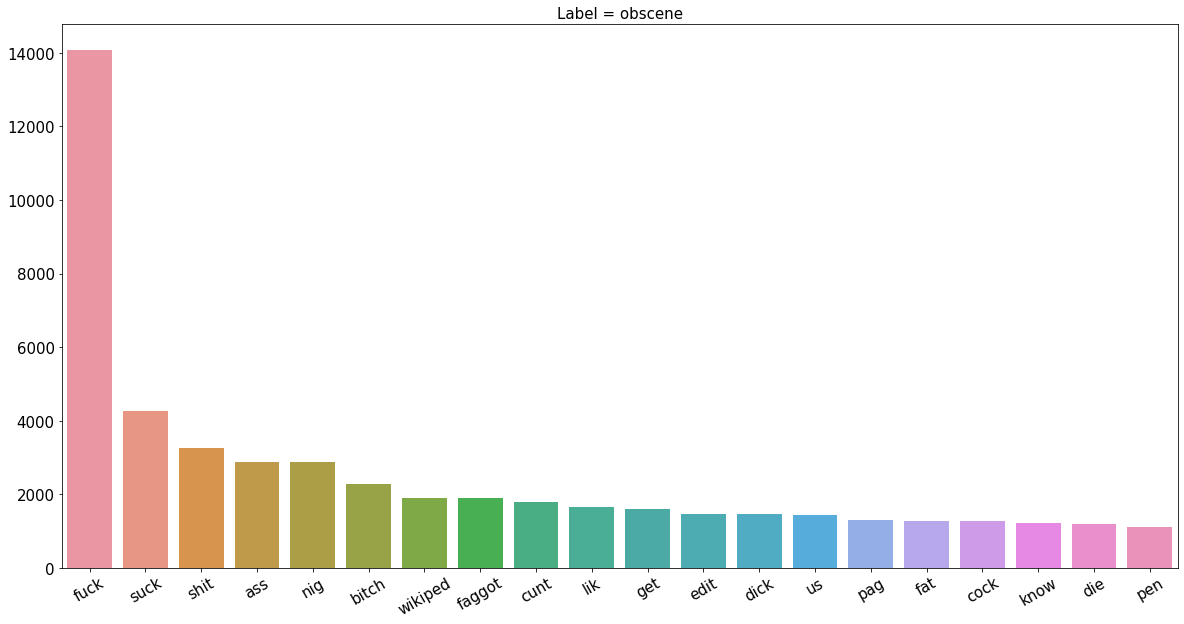

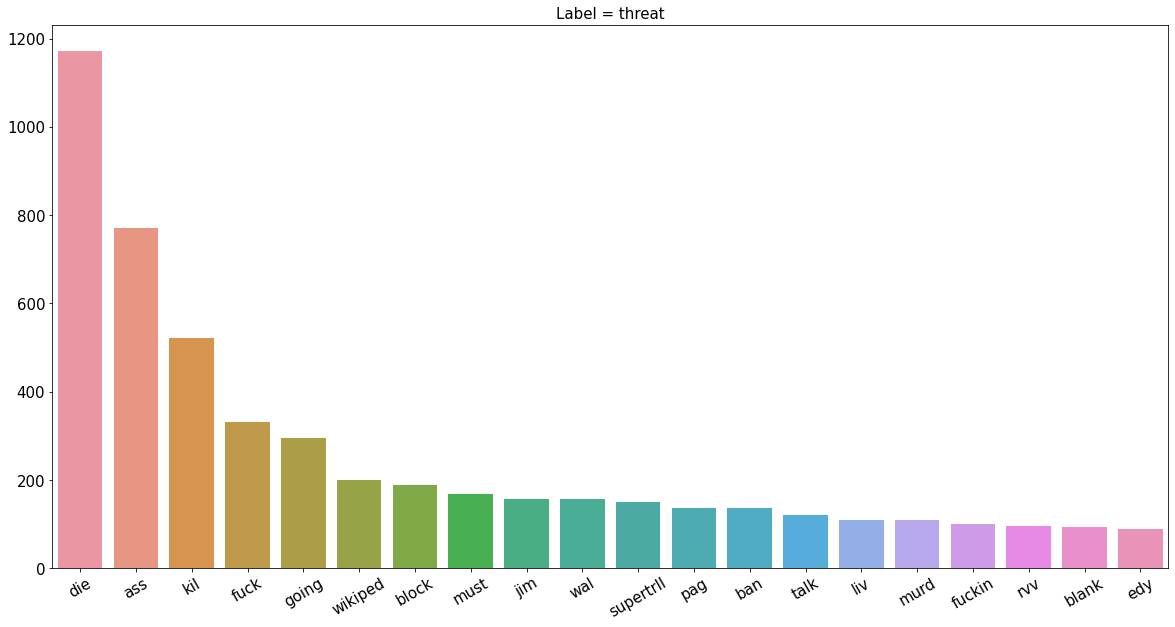

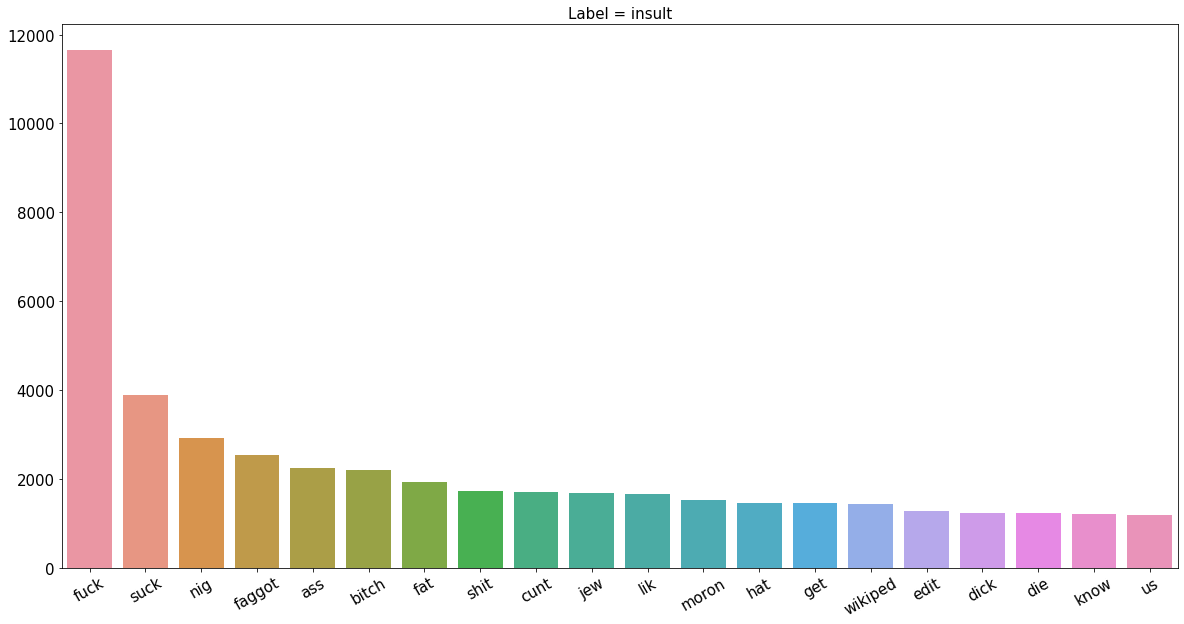

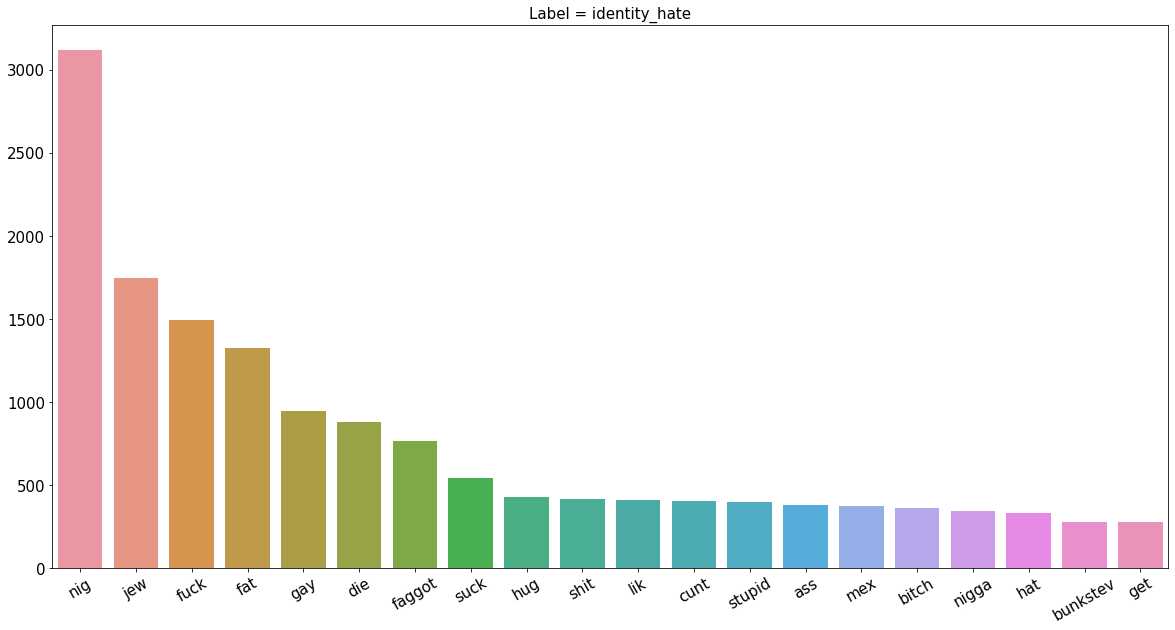

In [24]:
counts=[toxic_comment_cnt, severe_toxic_comment_cnt, obscene_comment_cnt, threat_comment_cnt,
       insult_comment_cnt, identity_hate_comment_cnt]

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

for (i, c) in zip(range(6), counts):
    most_common = collections.Counter(c).most_common(20)
    words = [w for w,_ in most_common]
    counts = [c for _,c in most_common]
    plt.figure(figsize=(20, 10))
    ax = sns.barplot(x=words, y=counts)
    ax.set_title(f'Label = {labels[i]}', fontsize=15)
    ax.tick_params(labelsize=15)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)